<a href="https://colab.research.google.com/github/mpily/basic-ml-course/blob/Assignment4/SolutionforLesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from sklearn.datasets import make_blobs  # for making datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  # for visualization
import numpy as np  # for computation
import random  # for random initialization
import time
from IPython.display import clear_output
import cv2

In [37]:
K = 4
X, y = make_blobs(n_samples=1000, n_features=2, centers=K, random_state=32)

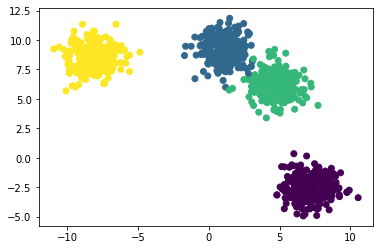

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
def init_centroids(X, K):
  rand_indexes = random.choices(range(1000), k=4)
  centroids = X[rand_indexes, :]
  print(rand_indexes)
  return centroids

In [ ]:
# for evaluation, we use fixed centroids instead of randomly initialized centroids
fixed_init_centroids = X[[0, 250, 500, 750] , :]

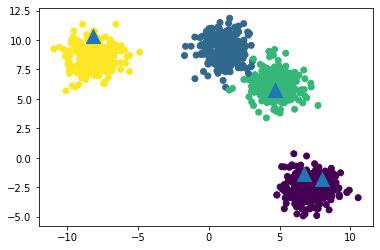

In [ ]:
def visualize(X, y, centroids):
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200)
  plt.show();
visualize(X, y, fixed_init_centroids)

In [ ]:
dp1 = X[0]
dp2 = X[1]

# write your code below
# you can use np.linalg.norm
distance = np.sqrt(np.sum((dp1-dp2)**2))
print(distance)
# eval
assert distance == 0.8347885963011235, "Your answer is not correct"

0.8347885963011235


In [ ]:
# write a function to calculate distance between data points to centroids
def data_centroid_distance(X, centroids):
  distance = np.zeros((X.shape[0], centroids.shape[0])) # in which distance[i, j] is the distance between X[i] and centroids[j]
  # write your code below
  for i in range(X.shape[0]):
    for j, centroid in enumerate(centroids):
      distance[i,j] = np.sqrt(np.sum((X[i] - centroid)**2))

  return distance

# evaluate
distance = data_centroid_distance(X, fixed_init_centroids)
assert distance[0, 0] == 0 and distance[250, 1] == 0 and distance[500, 2] == 0 and distance[750, 3] == 0, "Your answer is not correct"

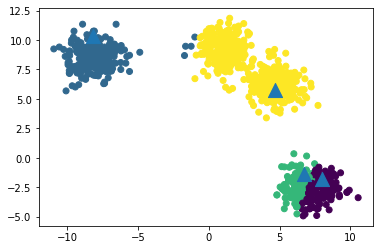

In [ ]:
# write a function which assigns data points to clusters
def assign_clusters(X, centroids):
  y = np.zeros((X.shape[0]))
  distance = data_centroid_distance(X, centroids)
  # write your code below
  for i in range(X.shape[0]):
    min_dist = distance[i,0]
    y[i]      = 0
    for j in range(len(distance[0])):
      if distance[i,j] < min_dist:
        min_dist = distance[i,j]
        y[i]      = j

  return y

# evaluate
assigned_y = assign_clusters(X, fixed_init_centroids)
assert assigned_y[0] == 0 and assigned_y[250] == 1 and assigned_y[500] == 2 and assigned_y[750] == 3, "Your answer is not correct"
visualize(X, assigned_y, fixed_init_centroids)  # check visually to see if the results are reasonable

In [ ]:
def recalculate_centroids(X, y, K):
  centroids = np.zeros((K, X.shape[1]))
  # write your code below
  for i in range(K):
    centroids[i,:] = np.average(X[y==i,:],axis=0)

  return centroids

Step: 3


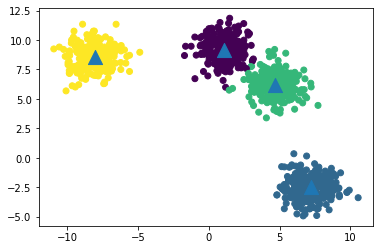

In [ ]:
def kmeans(X, K, max_iter=100):
  centroids = init_centroids(X,K)                 # write your code here , centroids should be initialized randomly
  for i in range(max_iter):
    y = assign_clusters(X,centroids)                       # write your code here
    new_centroids = recalculate_centroids(X,y,K)          # write your code here
    clear_output()
    print(f'Step: {i}')
    visualize(X, y, centroids)
    time.sleep(1)
    if np.array_equal(centroids, new_centroids):
      break
    centroids = new_centroids

# evaluate
kmeans(X, K)

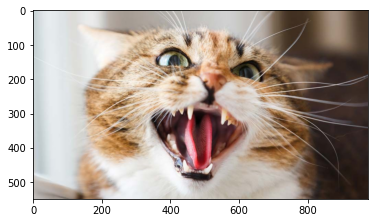

In [ ]:
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/41CF/production/_109474861_angrycat-index-getty3-3.jpg -O cat.jpg -q # download image 
original_img = cv2.imread("cat.jpg")[:, :, ::-1]
plt.imshow(original_img)


In [ ]:
def compress_image(original_img, n_colors=16):
  img = np.reshape(original_img, (-1, 3))
  kmeans = KMeans(n_clusters=n_colors, n_init=1)
  kmeans.fit(img)
  compressed_img = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(img.shape[0])]  # write your code here
  compressed_img = np.reshape(compressed_img, original_img.shape).astype('uint8')
  plt.imshow(compressed_img)

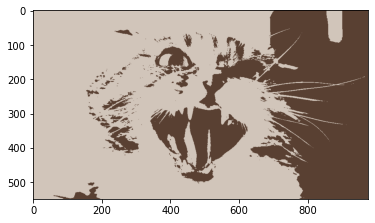

In [ ]:
compress_image(original_img,n_colors=2)

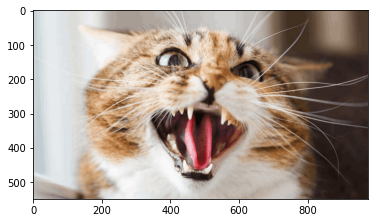

In [ ]:
compress_image(original_img,n_colors=128)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np


In [ ]:
data = load_iris()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

In [ ]:
def distance_to_point(dp1, dp2):
  distance = np.sqrt(np.sum((dp1-dp2)**2))
  return distance

In [ ]:
print(y_test.shape)

(60,)


In [ ]:
def KNN_predict(X_train, y_train, x_test, K):
  '''
  Evaluate the classification for `x_test` with K-nearest 
  neighbor given training set (X_train, y_train).
    
  Input:
    X_train: features of training set
    y_train: labels of training set
    x_test : features of test data point
    K      : number of nearest neighbors
  Output:
    Classification of the input data point.
  '''
  # write your code below
  shape = list(y_train.shape)
  shape[0] = x_test.size
  prediction = 0
  values = [(distance_to_point(x_test,X_train[i]),i)for i in range(len(X_train))]
  values.sort()
  frequencies = {}
  for index in range(K):
    if y_train[values[index][1]] in frequencies:
      frequencies[y_train[values[index][1]]] += 1
    else:
      frequencies[y_train[values[index][1]]] = 0
  max_value = 0
  for key in frequencies:
    if frequencies[key] > max_value:
      prediction = key
  return prediction

y_scratch_predict = np.zeros(y_test.shape)
for i, x_test in enumerate(X_test):
  y_scratch_predict[i] = KNN_predict(X_train, y_train, x_test, 3)
cls = KNeighborsClassifier(n_neighbors=3, weights='uniform')
cls.fit(X_train, y_train)
y_sklearn_pred = cls.predict(X_test)
match = accuracy_score(y_scratch_predict, y_sklearn_pred)
print(match)
assert match == 1.0, 'Your answer is not correct'

1.0


Let $C = \{c_1,c_2,c_3,...,c_k\}$ be the y values of the $k$ closest points to test point. Consider picking value $c_i$ with probability. The Expected value of the test point $x$ will thus be:
$$E(x) = \sum_{i = 1} ^{k} c_{i}\cdot w_{i}$$
We cn use linear regression to solve for the weights $w_{i}$.

In [67]:
def closest_k_points(x_test,X_train,K,y_train):
  values = np.array([[distance_to_point(x_test,X_train[i]),y_train[i]] for i in range(len(X_train))])
  values.sort()
  #remove the point so as to prevent bias during training
  values = values[:,1]
  if values[0] == 0:
    values = values[1:]
  return values[0:K]

In [105]:

def train(x_train,y_train,K):
  x_vals = np.zeros((len(x_train),K))
  for i,x_test in enumerate(x_train):
    x_vals[i] = closest_k_points(x_test,x_train,K,y_train)
  theta = np.linalg.inv(x_vals.T @ x_vals) @ x_vals.T @ y_train
  return theta

  

In [106]:
# write your code below
#does not work well and is difficult to edit
#has a maximum accuracy of 98.3333 when k = 1 and 2. the value of the accuracy then decreases
#as K increases
K = 2
weights = 'distance'
model = train(X_train,y_train,K)
def get_weights(distances):
  return model
cls = KNeighborsClassifier(n_neighbors=K, weights=get_weights)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

# assert acc == 1.0, 'Your answer is not correct'

Accuracy:  0.9833333333333333


In [112]:
# write your code below
#using distance for weights
#accuracy starts at 98.3333% and increases till 100% when K is 11
K = 11
weights = 'distance'

cls = KNeighborsClassifier(n_neighbors=K, weights=weights)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

# assert acc == 1.0, 'Your answer is not correct'

Accuracy:  1.0


In [115]:
# write your code below
#using uniform weights
#accuracy starts at 98.3333% and increases till 100% when K is 11
K = 11
weights = 'uniform'

cls = KNeighborsClassifier(n_neighbors=K, weights=weights)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

# assert acc == 1.0, 'Your answer is not correct'

Accuracy:  1.0


In [144]:
# write your code below
#does not work well and is difficult to edit
#has a maximum accuracy of 98.3333 when k = 1 and 2. 
#the value of accuracy increases and at times when k = 7 we get accuracy of 1.0!
K = 7
def get_weights(distances):
  return np.random.rand(K)
cls = KNeighborsClassifier(n_neighbors=K, weights=get_weights)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

# assert acc == 1.0, 'Your answer is not correct'

Accuracy:  1.0
